In [1]:
import matplotlib
matplotlib.rc("font", size=18)
import matplotlib.pyplot as plt
import soxs
import astropy.io.fits as pyfits


soxs : [WARNING  ] 2024-05-14 23:45:21,551 Setting 'soxs_data_dir' to /Users/andrewwright/Library/Caches/soxs for this session. Please update your configuration if you want it somewhere else.


In [2]:
from soxs import get_instrument_from_registry, add_instrument_to_registry #making our chandra cy13 instrument simulator
new_chandra = get_instrument_from_registry("chandra_aciss_cy22")
new_chandra["name"] = "chandra_aciss_sgra_cy13" # Must change the name, otherwise an error will be thrown
new_chandra["arf"] = "asgras_src.arf"
new_chandra["rmf"] = "asgras_src.rmf"


name = add_instrument_to_registry(new_chandra)

# Make exposures

In [4]:

soxs.make_exposure_map("REVabs_MHD_dp15m2Ms_500ks_chandra13_evt.fits", "testexpmapREV.fits", 6.5, overwrite=True)
# inpts are evt file, output file name, energy in keV)
# i choose 6.5 keV because it is within our range of 4-9 keV
# this takes a bit ~10min

soxs : [WARNING  ] 2024-05-13 14:59:48,587 Using local file asgras_src.arf instead of the one from the database.


Creating exposure map :   0%|          | 0/256 [00:00<?, ?it/s]

In [ ]:
soxs.make_exposure_map("noabs_RAM_dp15m2Ms_chandr500ks_evt.fits", "testexpmapRAM.fits", 6.5, overwrite=True)
#soxs.make_exposure_map("bkgnd13_230ks_evt.fits", "testexpmapNSC13.fits", 6.5, overwrite=True) 
# inpts are evt file, output file name, energy in keV)
# i choose 6.5 keV because it is within our range of 4-9 keV
# this takes a bit ~10min

# Make radial profiles

### Athena model (MHD)

In [5]:
# 2-4 keV radial brightness profile
from soxs import write_radial_profile
ctr = [266.42, -29] # by default the center is in celestial coordinates
rmin = 0.0 # arcseconds
rmax = 40.48 # arcseconds (max for MHD) 40.48arcseconds (max for MHD)
nbins = 80 # number of bins
emin = 2.0 # keV
emax = 4.0 # keV
write_radial_profile("REVabs_MHD_dp15m2Ms_500ks_chandra13_evt.fits", "REVabs_RAM2to4radial_profile.fits", ctr, rmin,
                     rmax, nbins, emin=emin, emax=emax,  expmap_file="testexpmapREV.fits",overwrite=True)

In [6]:
# 4-8 keV radial brightness profile
from soxs import write_radial_profile
ctr = [266.42, -29] # by default the center is in celestial coordinates
rmin = 0.0 # arcseconds
rmax = 40.48 # arcseconds (max for MHD) 40.48arcseconds (max for MHD)
nbins = 80 # number of bins
emin = 4.0 # keV
emax = 8.0 # keV
write_radial_profile("REVabs_MHD_dp15m2Ms_500ks_chandra13_evt.fits", "REVabs_RAM4to8radial_profile.fits", ctr, rmin,
                     rmax, nbins, emin=emin, emax=emax,  expmap_file="testexpmapREV.fits",overwrite=True)

### RAMSES model (RAM)

In [ ]:
from soxs import write_radial_profile
ctr = [266.42, -29] # by default the center is in celestial coordinates
rmin = 0.0 # arcseconds
rmax = 40.48 # arcseconds (max for MHD) 40.48arcseconds (max for MHD)
nbins = 80 # number of bins
emin = 2.0 # keV
emax = 4.0 # keV
write_radial_profile("noabs_RAM_dp15m2Ms_chandr500ks_evt.fits", "noabs_RAM2to4radial_profile.fits", ctr, rmin,
                     rmax, nbins, emin=emin, emax=emax,  expmap_file="testexpmapRAM.fits",overwrite=True)

In [ ]:
from soxs import write_radial_profile
ctr = [266.42, -29] # by default the center is in celestial coordinates
rmin = 0.0 # arcseconds
rmax = 40.48 # arcseconds (max for MHD) 40.48arcseconds (max for MHD)
nbins = 80 # number of bins
emin = 4.0 # keV
emax = 8.0 # keV
write_radial_profile("noabs_RAM_dp15m2Ms_chandr500ks_evt.fits", "noabs_RAM4to8radial_profile.fits", ctr, rmin,
                     rmax, nbins, emin=emin, emax=emax,  expmap_file="testexpmapRAM.fits",overwrite=True)

# Open the files and plot it

In [3]:
fR2 = pyfits.open("REVabs_RAM2to4radial_profile.fits") #take a gander of the new radial brightness profile header
fR2["PROFILE"].columns
fR8 = pyfits.open("REVabs_RAM4to8radial_profile.fits") #take a gander of the new radial brightness profile header
fR8["PROFILE"].columns


ColDefs(
    name = 'RLO'; format = 'D'; unit = 'arcsec'
    name = 'RHI'; format = 'D'; unit = 'arcsec'
    name = 'RMID'; format = 'D'; unit = 'arcsec'
    name = 'AREA'; format = 'D'; unit = 'arcsec**2'
    name = 'NET_COUNTS'; format = 'D'; unit = 'count'
    name = 'NET_ERR'; format = 'D'; unit = 'count'
    name = 'NET_RATE'; format = 'D'; unit = 'count/s'
    name = 'ERR_RATE'; format = 'D'; unit = 'count/s'
    name = 'SUR_BRI'; format = 'D'; unit = 'count/s/arcsec**2'
    name = 'SUR_BRI_ERR'; format = '1D'; unit = 'count/s/arcsec**2'
    name = 'MEAN_SRC_EXP'; format = 'D'; unit = 'cm**2'
    name = 'NET_FLUX'; format = 'D'; unit = 'count/s/cm**2'
    name = 'NET_FLUX_ERR'; format = 'D'; unit = 'count/s/cm**2'
    name = 'SUR_FLUX'; format = 'D'; unit = 'count/s/cm**2/arcsec**2'
    name = 'SUR_FLUX_ERR'; format = 'D'; unit = 'count/s/cm**2/arcsec**2'
)

In [4]:
fr24 = pyfits.open("noabs_RAM2to4radial_profile.fits") #take a gander of the new radial brightness profile header
fr24["PROFILE"].columns
fr48 = pyfits.open("noabs_RAM4to8radial_profile.fits") #take a gander of the new radial brightness profile header
fr48["PROFILE"].columns


ColDefs(
    name = 'RLO'; format = 'D'; unit = 'arcsec'
    name = 'RHI'; format = 'D'; unit = 'arcsec'
    name = 'RMID'; format = 'D'; unit = 'arcsec'
    name = 'AREA'; format = 'D'; unit = 'arcsec**2'
    name = 'NET_COUNTS'; format = 'D'; unit = 'count'
    name = 'NET_ERR'; format = 'D'; unit = 'count'
    name = 'NET_RATE'; format = 'D'; unit = 'count/s'
    name = 'ERR_RATE'; format = 'D'; unit = 'count/s'
    name = 'SUR_BRI'; format = 'D'; unit = 'count/s/arcsec**2'
    name = 'SUR_BRI_ERR'; format = '1D'; unit = 'count/s/arcsec**2'
    name = 'MEAN_SRC_EXP'; format = 'D'; unit = 'cm**2'
    name = 'NET_FLUX'; format = 'D'; unit = 'count/s/cm**2'
    name = 'NET_FLUX_ERR'; format = 'D'; unit = 'count/s/cm**2'
    name = 'SUR_FLUX'; format = 'D'; unit = 'count/s/cm**2/arcsec**2'
    name = 'SUR_FLUX_ERR'; format = 'D'; unit = 'count/s/cm**2/arcsec**2'
)

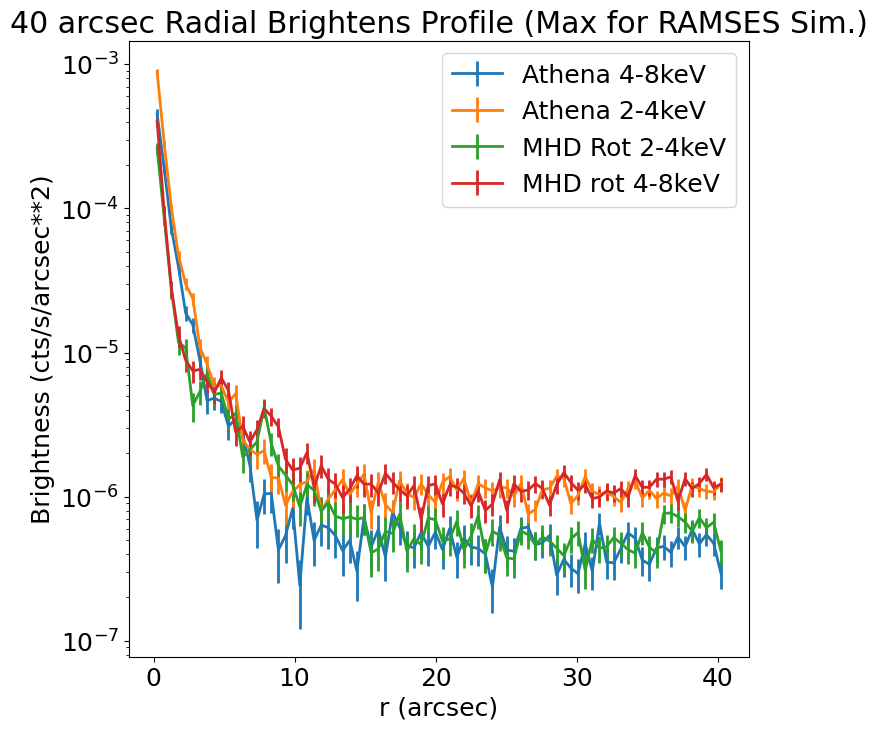

In [9]:
plt.figure(figsize=(8, 8))
plt.errorbar(
    fr24["profile"].data["rmid"], #profile r
    fr24["profile"].data["sur_bri"],
    lw=2, #line width
    yerr=fr24["profile"].data["sur_bri_err"], label = "Athena 4-8keV"#y-error bar
)

plt.errorbar(
    fr48["profile"].data["rmid"], #profile r
    fr48["profile"].data["sur_bri"],
    lw=2, #line width
    yerr=fr48["profile"].data["sur_bri_err"], label = "Athena 2-4keV"#y-error bar
)

plt.errorbar(
    fR2["profile"].data["rmid"], #profile r
    fR2["profile"].data["sur_bri"],
    lw=2, #line width
    yerr=fR2["profile"].data["sur_bri_err"], label = "MHD Rot 2-4keV"#y-error bar
)

plt.errorbar(
    fR8["profile"].data["rmid"], #profile r
    fR8["profile"].data["sur_bri"],
    lw=2, #line width
    yerr=fR8["profile"].data["sur_bri_err"], label = "MHD rot 4-8keV"#y-error bar
)

plt.xscale("linear")
plt.yscale("log")
plt.xlabel("r (arcsec)")
plt.ylabel("Brightness (cts/s/arcsec**2)")
plt.title("40 arcsec Radial Brightens Profile (Max for RAMSES Sim.)")
#plt.axvline(40.48, c="black",label = "Max for Ramses Sim.")
#plt.xlim(-2,22)
plt.legend()